<h1 align="center">Machine Learning Lab</h1>
<h3 align="center">Lab 02</h3>
<h3 align="center">Exercise 2 - Part A</h3>

#### Importing Packages

In [1]:
import numpy as np           #Importing Numpy

#### Initializing Normal Distribution Parameters and Matrix X and Matrix Y Shapes

In [2]:
mu = 2                     #Mean of Distribution
sigma = 0.01               #Standard Deviation of Data points
matX_shape = (100,10)      #Dimensions for Matrix X
matY_shape = (100,1)       #Dimensions for Matrix Y

#### Creating a Bias column to be added in Matrix X

In [3]:
#Initializing the bias column for b0
bias_column = np.ones(shape=(100,1))

#### Initializing Matrix X and Matrix Y

In [4]:
matX = [[np.random.normal(mu,sigma) for i in range(matX_shape[1])] for j in range(matX_shape[0])]
matX = np.array(matX)

#Appending bias column in the Matrix X for calculating b0
matX = np.append(bias_column,matX,axis=1)

In [5]:
matY = [[np.random.uniform(1,2) for i in range(matY_shape[1])] for j in range(matY_shape[0])]
matY = np.array(matY)

#### Function to Transpose the given Matrix

In [6]:
def transpose_matrix(matrix):
    result = []
    
    #Taking individual columns, flatten it into a single dimension 
    #row and then append it into our result matrix
    for i in range(matrix.shape[1]):
        curr_col = matrix[:,i]
        curr_col = curr_col.flatten()
        result.append(curr_col)
    
    return np.array(result)

#### Function to Multiply Two Matrices

In [7]:
def multiply_matrices(matA,matB):
    #Validates if matrix A columns are same as matrix B rows
    if matA.shape[1] != matB.shape[0]:
        raise Exception('Invalid Matrix Dimensions')
    
    matC = np.zeros(shape=(matA.shape[0],matB.shape[1]))
    for i in range(len(matA)):
        for j in range(len(matB[0])):
            for k in range(len(matB)):
                matC[i][j] += matA[i][k] * matB[k][j]
    return matC

#### Implementing Guassain Elimination Functions

In [8]:
def guassian_elimination(A,b):
    for k in range(len(A)-1):
        for i in range(k+1,len(A)):
            A[i][k] = A[i][k]/A[k][k]
            for j in range(k+1,len(A)):
                A[i][j] = A[i][j] - A[i][k] * A[k][j]
            b[i] = b[i] - A[i][k] * b[k]
    return (A,b)

In [9]:
def backward_substitution(A,b):
    x = np.zeros(shape=(len(A),1))
    for i in range(len(A)-1,-1,-1):
        s = b[i]
        for j in range(i+1,len(A)):
            s = s - A[i][j] * x[j]
        x[i] = s/A[i][i]
    return x

#### A Wrapper function which uses Guassian Elimination and Backward Substitution to calculate Beta values

In [10]:
def solve_linear_equations(A,b):
    #Using Guassian Elimination to simplify Matrix A and b
    A , b = guassian_elimination(A,b)
    #Using Backward Substitution to calculate the vector x which is our Beta values
    return backward_substitution(A,b)

#### Function to Learn Linear Regression model and Returns Beta Vector

In [11]:
def learn_simple_linreg(X,Y):
    X_tran = transpose_matrix(matX)
    # A = X^T.X
    A = multiply_matrices(X_tran,X)
    # b = X*T.Y
    b = multiply_matrices(X_tran,Y)
    beta = solve_linear_equations(A,b)
    return beta

#### Function which takes Matrix X and beta to predict our Predicted Y (y hat)

In [12]:
def predict_simple_linreg(X,beta):
    #Calculating yhat using equation y_hat = X.b
    y_hat = multiply_matrices(X,beta)
    return y_hat

#### Calculating Beta values using the Guassian Elimination method

In [13]:
#Calculating our beta values
beta = learn_simple_linreg(matX,matY)
print(beta)

[[12.38347074]
 [ 0.54140055]
 [-0.59475465]
 [ 2.57500107]
 [-1.65599471]
 [ 2.35415863]
 [-0.24840299]
 [ 0.56046431]
 [-2.96177026]
 [-4.45959388]
 [-1.55567627]]


#### Using Matrix X and Beta values calculating Predicted Y

In [14]:
#Calculating y_hat
y_hat = predict_simple_linreg(matX,beta)

#### Plot the training points from matrix Y and predicted values Y in the form of scatter graph.

In [15]:
import matplotlib.pyplot as plt      #Importing Matplotlib

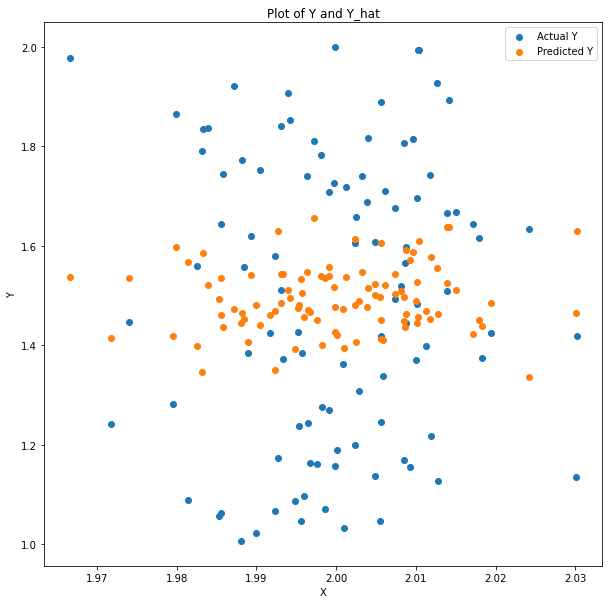

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(matX[:,1].reshape(-1,1),matY,label='Actual Y')
ax.scatter(matX[:,1].reshape(-1,1),y_hat,label='Predicted Y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Plot of Y and Y_hat')
plt.legend()
plt.show()

#### In the end use numpy.linalg.lstsq to learn β0:10 and plot the predictions from these parameters.

In [17]:
np_beta = np.linalg.lstsq(matX,matY,rcond=None)[0]
print(np_beta)

[[12.38347074]
 [ 0.54140055]
 [-0.59475465]
 [ 2.57500107]
 [-1.65599471]
 [ 2.35415863]
 [-0.24840299]
 [ 0.56046431]
 [-2.96177026]
 [-4.45959388]
 [-1.55567627]]


In [18]:
#Calculating y_hat with numpy beta values
y_hat = predict_simple_linreg(matX,np_beta)

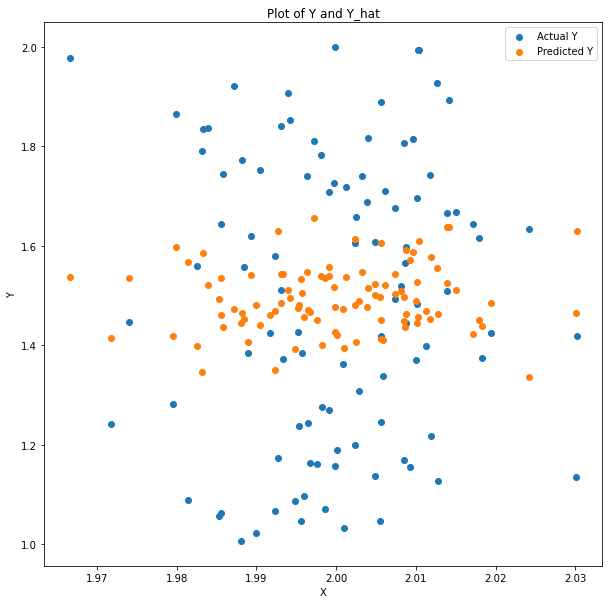

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(matX[:,1].reshape(-1,1),matY,label='Actual Y')
ax.scatter(matX[:,1].reshape(-1,1),y_hat,label='Predicted Y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Plot of Y and Y_hat')
plt.legend()
plt.show()